## Personal ML project - Diabetes prediction 

1. Our database: Diabetes 130-US Hospitals for Years 1999-2008
https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

# Number of instances
101766

# Associated Tasks
Classification, Clustering



In [4]:
import pandas as pd
import zipfile
import requests
from io import BytesIO

# Download the zip file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip"
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content)) as z:
    # Extract the main CSV file
    with z.open('dataset_diabetes/diabetic_data.csv') as f:
        diabetes = pd.read_csv(f)
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Exploring the data 

- Histogram, boxplots and bar charts will be used to analyze the structure of the data 
- Check the feature distribution and evaluate what are the most related with diabetes 
- Check for the categories that posses an specific meaning 

In [5]:
print(diabetes.shape)
print(diabetes.columns)

(101766, 50)
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [7]:
# Do a train test split of the original training data
from sklearn.model_selection import train_test_split

diabetes_train, diabetes_test = train_test_split(diabetes, test_size=0.2, random_state=42)

print("Train data shape:", diabetes_train.shape)
print("Test data shape:", diabetes_test.shape)

Train data shape: (81412, 50)
Test data shape: (20354, 50)


## We will visualize the distributions and relevant relationships

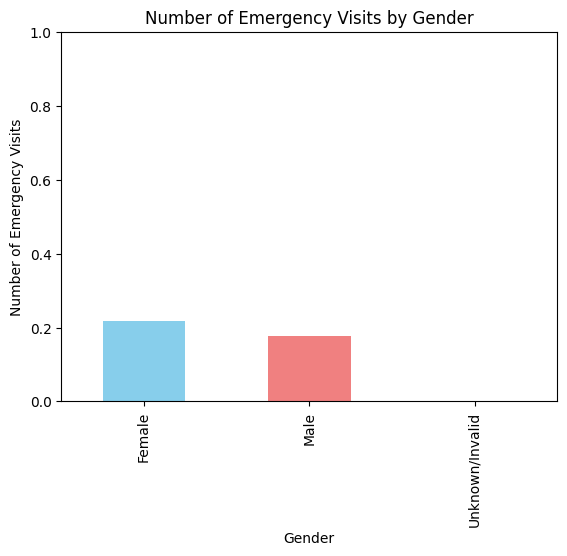

In [8]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt


def plot_number_emergency_by_gender(df):
    number_emergency = df.groupby("gender")["number_emergency"].mean()
    number_emergency.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Number of Emergency Visits by Gender")
    plt.ylabel("Number of Emergency Visits")
    plt.xlabel("Gender")
    plt.ylim(0, 1)
    plt.show()

plot_number_emergency_by_gender(diabetes_train)


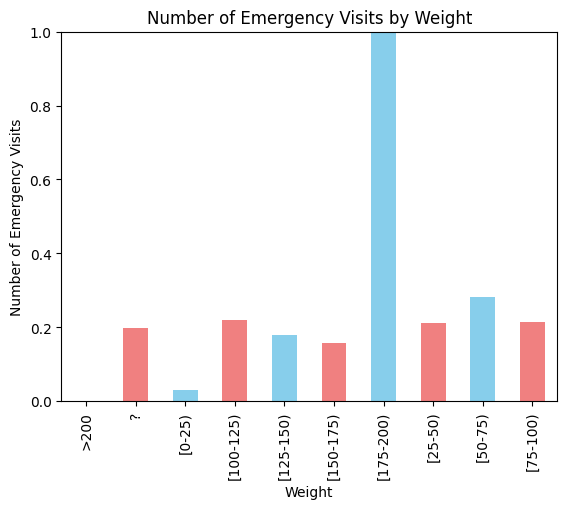

In [9]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt


def plot_number_emergency_by_weight(df):
    number_emergency = df.groupby("weight")["number_emergency"].mean()
    number_emergency.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Number of Emergency Visits by Weight")
    plt.ylabel("Number of Emergency Visits")
    plt.xlabel("Weight")
    plt.ylim(0, 1)
    plt.show()
plot_number_emergency_by_weight(diabetes_train)




In [30]:
# Print unique values/groups in the 'weight' column
print("Original weight groups:", diabetes_train['weight'].unique())

# Reorganize weight groups into ordered categories
# Example: group into bins (if weights are ranges), or map to ordered categories

# If weight is in ranges like '[75-100)', '[100-125)', etc.
weight_order = [
    'Underweight', '[0-25)', '[25-50)', '[50-75)', '[75-100)', '[100-125)', '[125-150)', '[150-175)', '[175-200)', '[200-225)', '[225-250)', '[250-275)', '[275-300)', '[300-325)', '[325-350)', '[350-375)', '[375-400)', 'Over 400', 'Unknown'
]

# Create a mapping for more organized categories
weight_map = {
    '[0-25)': 'Underweight',
    '[25-50)': 'Underweight',
    '[50-75)': 'Normal',
    '[75-100)': 'Normal',
    '[100-125)': 'Overweight',
    '[125-150)': 'Obese',
    '[150-175)': 'Obese',
    '[175-200)': 'Severely Obese',
    '[200-225)': 'Severely Obese',
    '[225-250)': 'Morbidly Obese',
    '[250-275)': 'Morbidly Obese',
    '[275-300)': 'Morbidly Obese',
    '[300-325)': 'Morbidly Obese',
    '[325-350)': 'Morbidly Obese',
    '[350-375)': 'Morbidly Obese',
    '[375-400)': 'Morbidly Obese',
    'Over 400': 'Morbidly Obese',
    '?': 'Normal'
}

# Apply the mapping to create a new column with organized weight groups
diabetes_train['weight_group'] = diabetes_train['weight'].map(weight_map)
print("Organized weight groups:", diabetes_train['weight_group'].unique())




Original weight groups: ['?' '[50-75)' '[125-150)' '[75-100)' '[0-25)' '[150-175)' '[100-125)'
 '[25-50)' '[175-200)' '>200']
Organized weight groups: ['Normal' 'Obese' 'Underweight' 'Overweight' 'Severely Obese' nan]


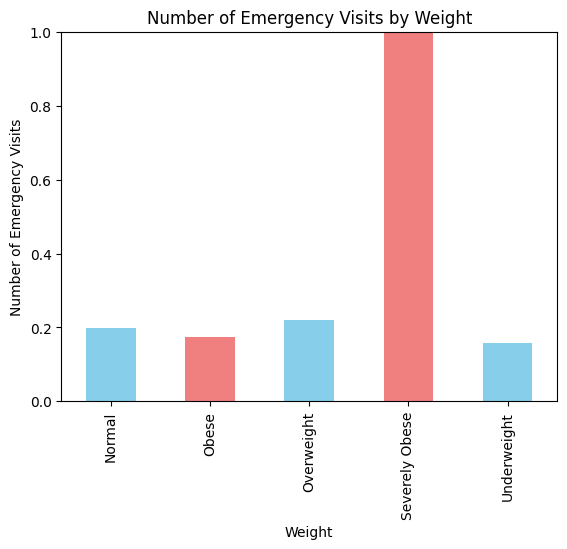

In [11]:
def plot_number_emergency_by_weight(df):
    number_emergency = df.groupby("weight_group")["number_emergency"].mean()
    number_emergency.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Number of Emergency Visits by Weight")
    plt.ylabel("Number of Emergency Visits")
    plt.xlabel("Weight")
    plt.ylim(0, 1)
    plt.show()
plot_number_emergency_by_weight(diabetes_train)

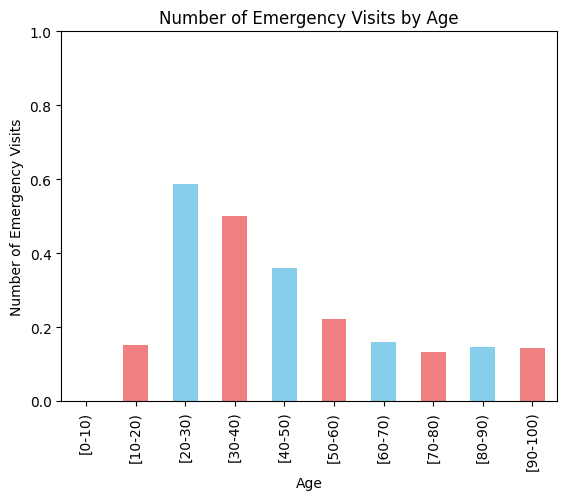

In [12]:
def plot_number_emergency_by_age(df):
    number_emergency = df.groupby("age")["number_emergency"].mean()
    number_emergency.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Number of Emergency Visits by Age")
    plt.ylabel("Number of Emergency Visits")
    plt.xlabel("Age")
    plt.ylim(0, 1)
    plt.show()
plot_number_emergency_by_age(diabetes_train)

In [13]:
# Define a function to map age bins to new categories
def map_age_category(age_str):
    # Remove brackets and split by '-'
    age_str = age_str.strip('[]')
    start, end = age_str.split('-')
    start = int(start)
    end = int(end.replace(')', ''))
    if start < 30:
        return '0-30'
    elif start < 60:
        return '30-60'
    elif start < 90:
        return '60-90'
    else:
        return '90-120'

# Apply to diabetes_train and diabetes_train_clean
diabetes_train['age_group'] = diabetes_train['age'].apply(map_age_category)

In [33]:
def map_weight_category(weight_str):
    """
    Maps the original weight bin/range string to a simplified weight category.
    """
    return weight_map.get(weight_str, 'Unknown')

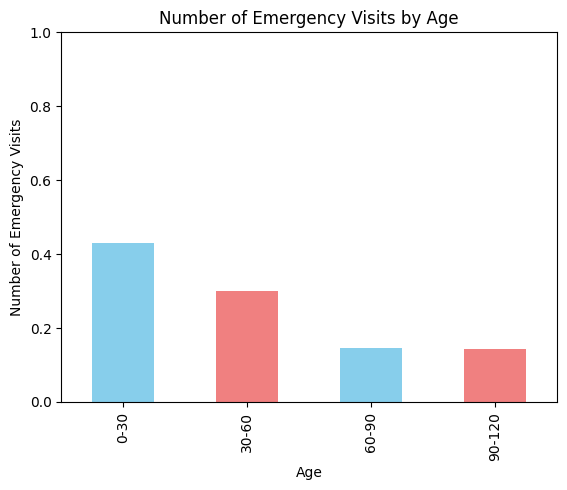

In [14]:
def plot_number_emergency_by_age(df):
    number_emergency = df.groupby("age_group")["number_emergency"].mean()
    number_emergency.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Number of Emergency Visits by Age")
    plt.ylabel("Number of Emergency Visits")
    plt.xlabel("Age")
    plt.ylim(0, 1)
    plt.show()
plot_number_emergency_by_age(diabetes_train)

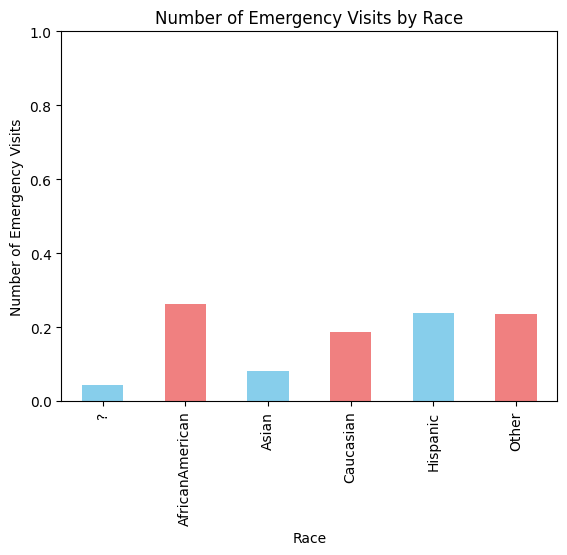

In [15]:
def plot_number_emergency_by_race(df):
    number_emergency = df.groupby("race")["number_emergency"].mean()
    number_emergency.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Number of Emergency Visits by Race")
    plt.ylabel("Number of Emergency Visits")
    plt.xlabel("Race")
    plt.ylim(0, 1)
    plt.show()
plot_number_emergency_by_race(diabetes_train)

race_group
Caucasian          60871
AfricanAmerican    15325
Other               3049
Hispanic            1650
Asian                517
Name: count, dtype: int64


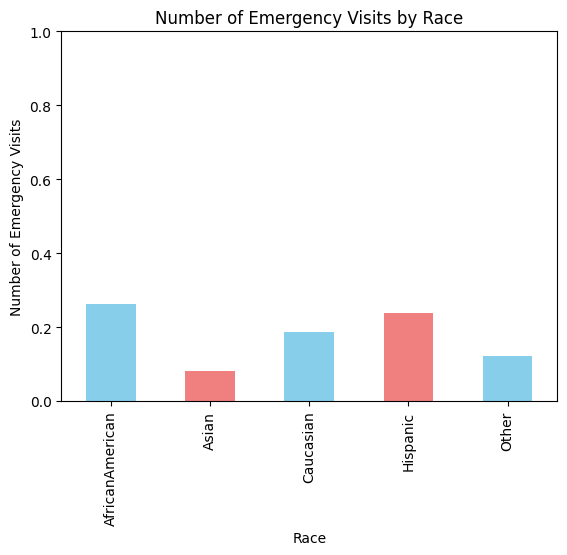

In [16]:
# Combine 'Other' and '?' categories in the 'race' column of diabetes_train and save as 'race_group'
diabetes_train['race_group'] = diabetes_train['race'].replace('?', 'Other')
print(diabetes_train['race_group'].value_counts())

def plot_number_emergency_by_race(df):
    number_emergency = df.groupby("race_group")["number_emergency"].mean()
    number_emergency.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Number of Emergency Visits by Race")
    plt.ylabel("Number of Emergency Visits")
    plt.xlabel("Race")
    plt.ylim(0, 1)
    plt.show()
plot_number_emergency_by_race(diabetes_train)

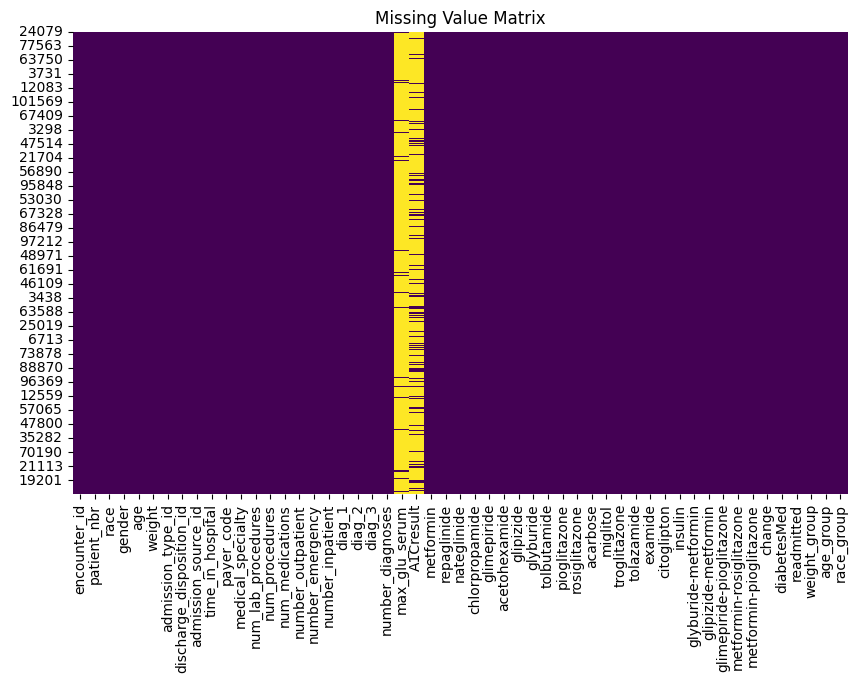

In [17]:
def plot_missing_value_matrix(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Missing Value Matrix")
    plt.show()

plot_missing_value_matrix(diabetes_train)

## Drop 2 of the columns that have missing information for sure 
**Completely excluded them because the missing values are too abundant**
- max_glu_serum
- A1Cresult

**Excluded because I want to make a basing model first later we can integrate them if the performance of the model is not proper**

- Payer_code
- medical_speciality 
- diag_1, diag_2, diag_3

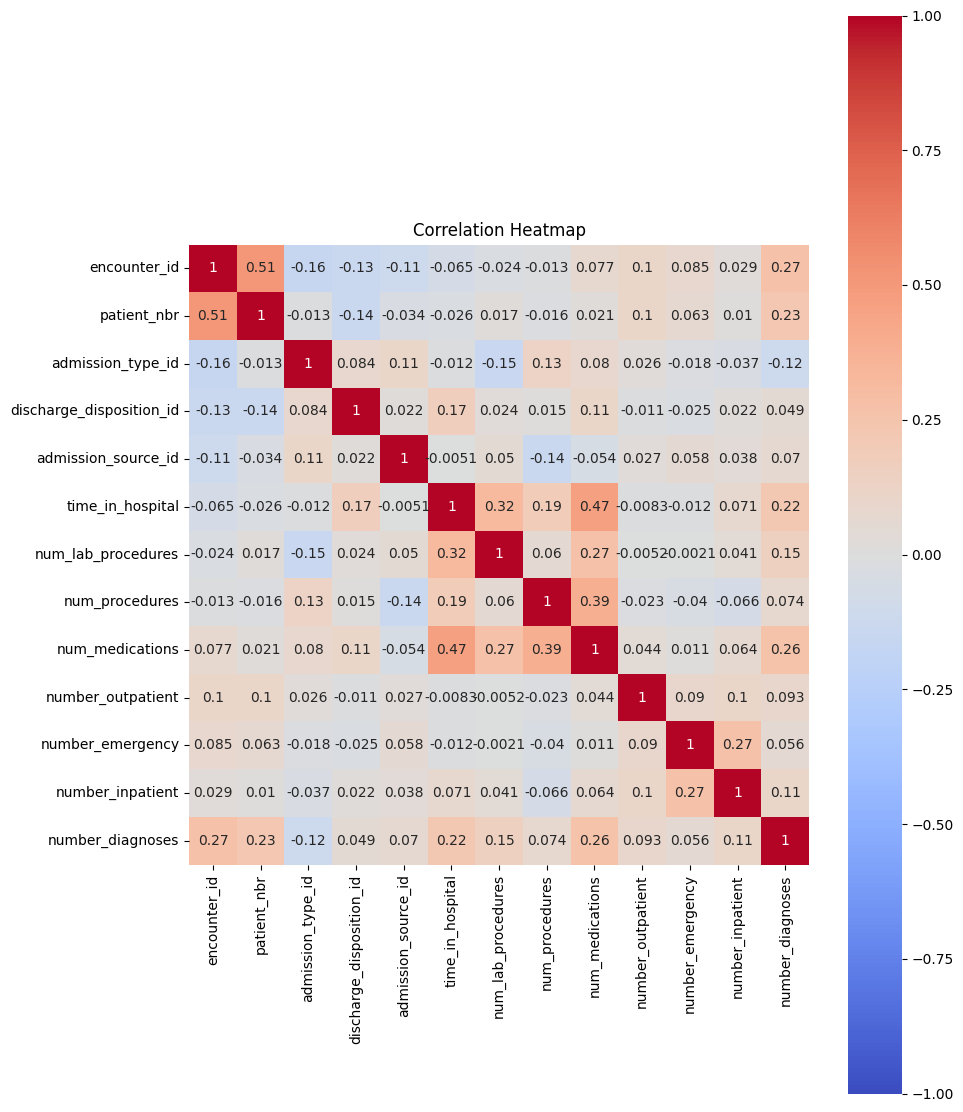

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(df):
    # keep only the columns we want, if they exist
    cols = df.select_dtypes(include=['number']).columns

    # coerce to numeric in case 'age' is stored as strings/bins
    data = df[cols].apply(pd.to_numeric, errors='coerce')

    plt.figure(figsize=(10, 14))  # set size BEFORE plotting
    ax = sns.heatmap(data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
    ax.set_title("Correlation Heatmap")
    plt.show()

# call
plot_correlation_heatmap(diabetes_train)


In [19]:
#So from the training data, we can see that the columns 'max_glu_serum', 'A1Cresult', 'Payer_code', 'medical_speciality',
# 'diag_1', 'diag_2', and 'diag_3' have a lot of missing values, so I want to remove them from the training data 

cols_to_drop = ['max_glu_serum', 'A1Cresult', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']
diabetes_train_clean = diabetes_train.drop(columns=cols_to_drop)
diabetes_train_clean.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,weight_group,age_group,race_group
24079,81844290,94788,Caucasian,Female,[70-80),?,1,1,7,4,...,No,No,No,No,No,No,NO,Normal,60-90,Caucasian
98079,396159158,135023315,Caucasian,Male,[50-60),?,1,1,7,1,...,No,No,No,No,No,No,>30,Normal,30-60,Caucasian
6237,31258956,18397782,Caucasian,Male,[80-90),?,1,1,7,4,...,No,No,No,No,No,Yes,NO,Normal,60-90,Caucasian
72208,210691074,67509558,Caucasian,Male,[80-90),?,1,3,7,3,...,No,No,No,No,Ch,Yes,NO,Normal,60-90,Caucasian
33075,104902980,23272362,AfricanAmerican,Female,[70-80),?,1,11,7,11,...,No,No,No,No,No,No,NO,Normal,60-90,AfricanAmerican


In [20]:
# Select columns that are likely to be most significant for diabetes/emergency visits
# We'll include some numeric features and the encoded categorical columns
important_cols = [
    'number_emergency', 
    'number_inpatient',
    'number_outpatient',
    'num_lab_procedures',
    'num_medications',
    'time_in_hospital',
    'age_group_enc',
    'weight_group_enc',
    'race_group_enc',
    'gender_enc'
]

# Filter to only columns that exist in encoded_df
pairplot_cols = [col for col in important_cols if col in encoded_df.columns]

sns.pairplot(encoded_df[pairplot_cols], hue='time_in_hospital', diag_kind='hist', palette='coolwarm')
plt.suptitle("Pairplot of Most Significant Variables", y=1.02)
plt.show()

NameError: name 'encoded_df' is not defined

## Classificator


- I want my classificator to predict how many days my diabetic patients have been hospitalized base on the data set to predict the time_in_hospital accurately, to keep working with this dataset we will have to 

/var/folders/zn/168nw9p56h9_1x_smvw9yfcr0000gn/T/ipykernel_44174/4157934415.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=df, ax=axes[0], palette="Blues")
/var/folders/zn/168nw9p56h9_1x_smvw9yfcr0000gn/T/ipykernel_44174/4157934415.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weight_group', data=df, ax=axes[1], palette="Greens")
/var/folders/zn/168nw9p56h9_1x_smvw9yfcr0000gn/T/ipykernel_44174/4157934415.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='race_group', data=df, ax=axes[2], palette

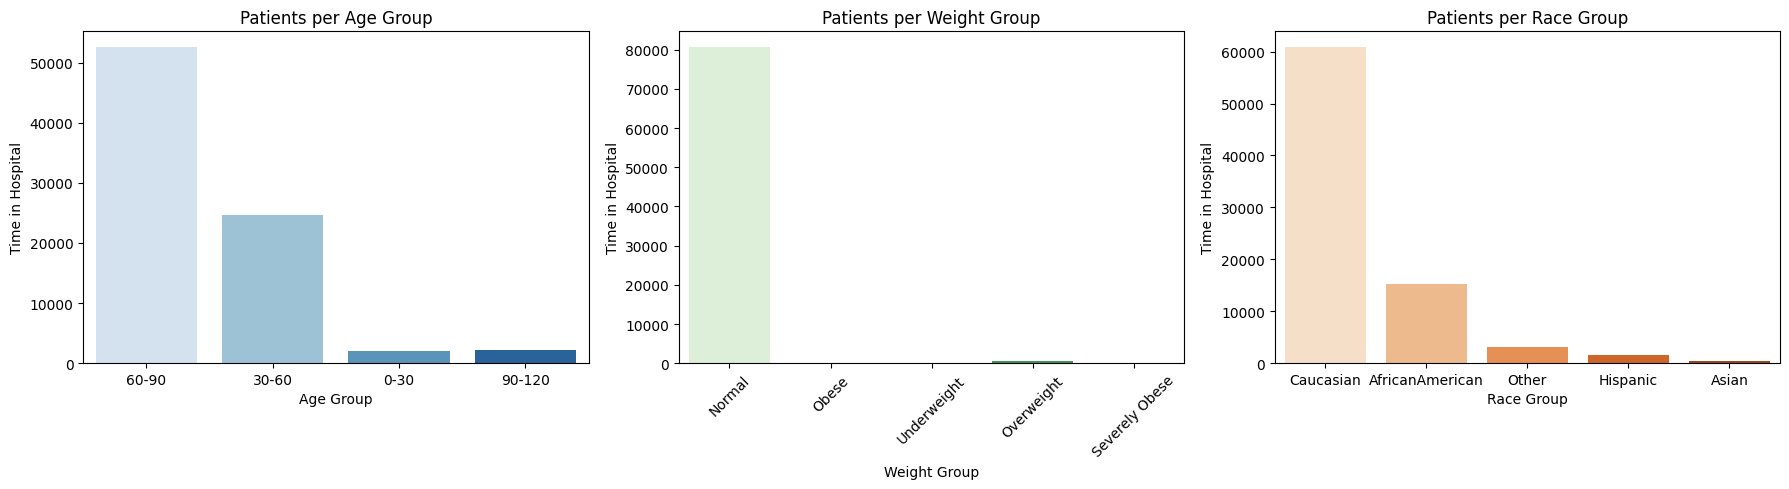

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

df = diabetes_train.dropna(
    subset=['time_in_hospital', 'age_group', 'weight_group', 'race_group']
).copy()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age group distribution
sns.countplot(x='age_group', data=df, ax=axes[0], palette="Blues")
axes[0].set_title("Patients per Age Group")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Time in Hospital")

# Weight group distribution
sns.countplot(x='weight_group', data=df, ax=axes[1], palette="Greens")
axes[1].set_title("Patients per Weight Group")
axes[1].set_xlabel("Weight Group")
axes[1].set_ylabel("Time in Hospital")
axes[1].tick_params(axis='x', rotation=45)

# Race group distribution
sns.countplot(x='race_group', data=df, ax=axes[2], palette="Oranges")
axes[2].set_title("Patients per Race Group")
axes[2].set_xlabel("Race Group")
axes[2].set_ylabel("Time in Hospital")

plt.tight_layout()
plt.show()


## Data preparation for running my model 

- We handled the missing values and formating of age, weight and race to make it more suitable for the model
- We dropped irrelevant and highly missing values variables, we will also drop encounter id and patient number since it do not contribute significantly in anything for the model 
- Categorical values will be further one-hot encoding into numerical format
- Numerical will be standarized for zero mean and unit variance

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# We create a helper class to add new features to the DataFrame
class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_age_group=True, add_weight_group=True, add_race_group=True):
        self.add_age_group = add_age_group
        self.add_weight_group = add_weight_group
        self.add_race_group = add_race_group

    def fit(self, X, y=None):
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self, X):
        if self.add_age_group:
            # Add new feature: age group based on 'age' column
            X['age_group'] = X['age'].apply(map_age_category)
            X = X.drop(columns=["age"])
        if self.add_weight_group:
            # Add new feature: weight group based on 'weight' column
            X['weight_group'] = X['weight'].apply(map_weight_category)
            X = X.drop(columns=["weight"])
        if self.add_race_group:
            # Add new feature: race group based on 'race' column
            X['race_group'] = X['race'].replace('?', 'Other')
            X = X.drop(columns=["race"])
        return X

feature_adder_pipeline = Pipeline([
    ("feature_adder", FeatureAdder(add_age_group=True, add_weight_group=True, add_race_group=True))
])

## Pipeline for categorical attributes 

- for a better understanding and visualization for the model categorical values were preprocessed into binary coding assigning new columns for multiple categorical variables. 


In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Create a pipeline to handle the categorical features
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")), # Other options for categorical features could be 'constant' or 'drop'
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])

In [42]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler
num_selector = make_column_selector(dtype_include=["int", "float"])      # picks Age, Fare, ...
cat_selector = make_column_selector(dtype_include=["object", "category", "bool"])
drop_columns = ["patient_nbr", "encounter_id", "payer_code",
                "medical_specialty",
                "max_glu_serum",
                "A1Cresult",
                "diag_1", "diag_2", "diag_3"]

drop_pipelines = ColumnTransformer(
    transformers = [
        ("drop", "drop", drop_columns)
    ],
    remainder="passthrough"  # Keep all other columns not specified in the transformers
)

transformer_pipeline = ColumnTransformer(
    transformers = [
        ("num", StandardScaler(), num_selector),
        ("cat", cat_pipeline, cat_selector),
    ],
    remainder="passthrough"
)

# Combine all preprocessing steps into a single pipeline
full_preprocess_pipeline = Pipeline([
    ("feature_adder", feature_adder_pipeline),
    ("feature_remover", drop_pipelines),
    ("transformer", transformer_pipeline)
])


In [47]:
print(full_preprocess_pipeline)

Pipeline(steps=[('feature_adder',
                 Pipeline(steps=[('feature_adder', FeatureAdder())])),
                ('feature_remover',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop', 'drop',
                                                  ['patient_nbr',
                                                   'encounter_id', 'payer_code',
                                                   'medical_specialty',
                                                   'max_glu_serum', 'A1Cresult',
                                                   'diag_1', 'diag_2',
                                                   'diag_3'])])),
                ('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x294caadd0

## Model Set up

### Choosing the targeted value:

- The ML model will require its inputs and we needed to choose a target variable for the model prediction, in this case I have decided to allow the model to predict the time a patient will be in the hospital, represented in the database as time_in_hospital 

- It can be important since when having a patient entering under the same conditions doctors and nurses can have an approximation of the days the patience will be within the hospital, plus it is important from an economical point of view for the expenses associated to the stay either for the member or the insurance company covering the treatment.

In [57]:

# Extract the target variable and drop it from the training and test data
y_train = diabetes_train["time_in_hospital"]  # Target variable
X_train = diabetes_train.drop(columns=["time_in_hospital"])  # Drop the target variable from the training data

y_test = diabetes_test["time_in_hospital"]  # Target variable for the test set
X_test = diabetes_test.drop(columns=["time_in_hospital"])  # Drop the target variable from the test data


In [58]:
from sklearn import set_config
set_config(transform_output="pandas")

X_train = full_preprocess_pipeline.fit_transform(X_train)  # Apply the transformations to the training set

# Get the column names of the transformed DataFrame, split by '__', and extract the last entries
X_train.columns = X_train.columns.str.split("__").str[-1]  # Flatten the column names
# Convert the columns to a list
columns = X_train.columns.tolist()

In [50]:
columns

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'gender_Female',
 'gender_Male',
 'gender_Unknown/Invalid',
 'metformin_Down',
 'metformin_No',
 'metformin_Steady',
 'metformin_Up',
 'repaglinide_Down',
 'repaglinide_No',
 'repaglinide_Steady',
 'repaglinide_Up',
 'nateglinide_Down',
 'nateglinide_No',
 'nateglinide_Steady',
 'nateglinide_Up',
 'chlorpropamide_Down',
 'chlorpropamide_No',
 'chlorpropamide_Steady',
 'chlorpropamide_Up',
 'glimepiride_Down',
 'glimepiride_No',
 'glimepiride_Steady',
 'glimepiride_Up',
 'acetohexamide_No',
 'acetohexamide_Steady',
 'glipizide_Down',
 'glipizide_No',
 'glipizide_Steady',
 'glipizide_Up',
 'glyburide_Down',
 'glyburide_No',
 'glyburide_Steady',
 'glyburide_Up',
 'tolbutamide_No',
 'tolbutamide_Steady',
 'pioglitazone_Down',
 'pioglitazone_No',
 'pioglitazone_Steady',
 

In [59]:
X_test

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
35956,110939484,19274094,Caucasian,Female,[70-80),?,1,1,6,UN,...,No,Steady,No,No,No,No,No,No,Yes,NO
60927,170328306,65634327,Caucasian,Male,[50-60),?,1,1,1,HM,...,No,No,No,No,No,No,No,No,Yes,NO
79920,245688426,100657359,Caucasian,Female,[60-70),?,3,6,1,HM,...,No,No,No,No,No,No,No,No,Yes,NO
50078,150826224,83144448,Caucasian,Male,[30-40),?,2,1,1,CP,...,No,No,No,No,No,No,No,No,Yes,>30
44080,135993852,65234214,AfricanAmerican,Female,[60-70),?,1,2,7,?,...,No,No,No,No,No,No,No,No,Yes,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16156,61022328,93447369,Caucasian,Male,[80-90),?,1,1,7,?,...,No,Steady,No,No,No,No,No,No,Yes,<30
67386,189128682,97296336,Caucasian,Male,[40-50),?,3,1,1,BC,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
81342,251922018,84358062,Caucasian,Female,[70-80),?,1,1,7,HM,...,No,No,No,No,No,No,No,No,Yes,>30
72915,214461468,98468460,Caucasian,Male,[70-80),?,2,1,7,MC,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [60]:
X_test

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
35956,110939484,19274094,Caucasian,Female,[70-80),?,1,1,6,UN,...,No,Steady,No,No,No,No,No,No,Yes,NO
60927,170328306,65634327,Caucasian,Male,[50-60),?,1,1,1,HM,...,No,No,No,No,No,No,No,No,Yes,NO
79920,245688426,100657359,Caucasian,Female,[60-70),?,3,6,1,HM,...,No,No,No,No,No,No,No,No,Yes,NO
50078,150826224,83144448,Caucasian,Male,[30-40),?,2,1,1,CP,...,No,No,No,No,No,No,No,No,Yes,>30
44080,135993852,65234214,AfricanAmerican,Female,[60-70),?,1,2,7,?,...,No,No,No,No,No,No,No,No,Yes,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16156,61022328,93447369,Caucasian,Male,[80-90),?,1,1,7,?,...,No,Steady,No,No,No,No,No,No,Yes,<30
67386,189128682,97296336,Caucasian,Male,[40-50),?,3,1,1,BC,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
81342,251922018,84358062,Caucasian,Female,[70-80),?,1,1,7,HM,...,No,No,No,No,No,No,No,No,Yes,>30
72915,214461468,98468460,Caucasian,Male,[70-80),?,2,1,7,MC,...,No,Steady,No,No,No,No,No,No,Yes,>30


## Training Model Selection

Now I need to select our training model 
- From all the possible candidates form classification algorithms I need to select the most suitable for my dataset
- See how they fit the training data and evaluate their performace using cross-validation
- Compare their mean and spread using boxplots to compare stability and accuracy and select the best performing method 

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np

#Cross-validation function 
def evaluate_model(model, X, y, scoring="accuracy", cv=5, n_repeats=10):
    """
    Evaluate a model using cross-validation.

    Parameters:
    - model: The machine learning model to evaluate.
    - X: Features for training.
    - y: Target variable for training.
    - scoring: Scoring metric to use (default is accuracy).
    - cv: Number of cross-validation folds (default is 5).
    - n_repeats: Number of times to repeat the cross-validation (default is 10).

    Returns:
    - scores: Cross-validation scores.
    """
    all_scores = []
    # Using RepeatedStratifiedKFold to ensure that each fold has the same proportion of classes
    # and to repeat the cross-validation process multiple times

    tskf = RepeatedStratifiedKFold(n_splits=cv, n_repeats=n_repeats, random_state=42)
    for train_index, test_index in tskf.split(X, y):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_test_fold)

        score = accuracy_score(y_test_fold, y_pred)
        all_scores.append(score)

    return np.array(all_scores)
